In [1]:
import PIL as pil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from time import time

import libarary.graph_tools as gtl
import libarary.cpp as cpp
print('Pillow Version:', pil.__version__)
cpp.test()

Pillow Version: 10.0.0
hello worlsd
 304278004800


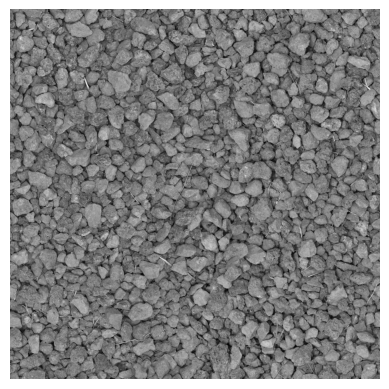

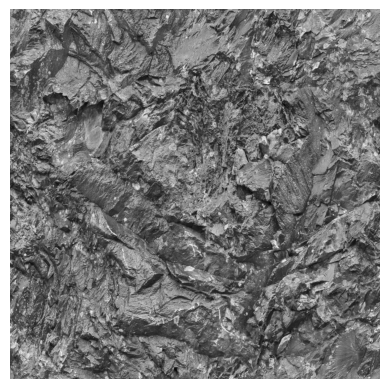

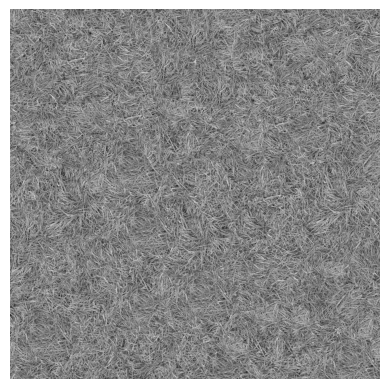

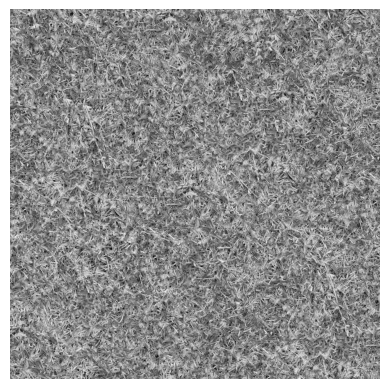

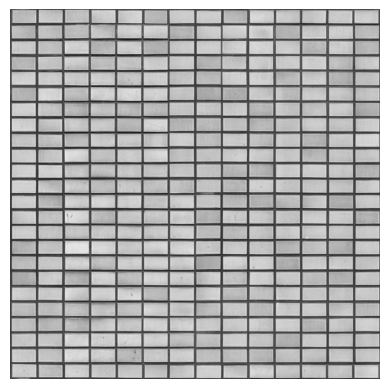

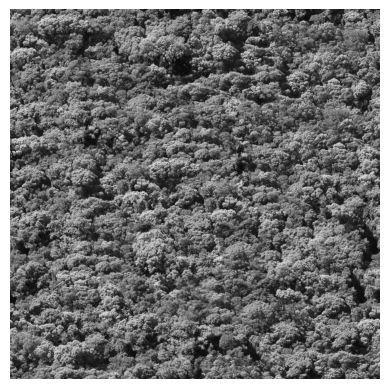

In [10]:
src_images = ["2", "4", "5", "6", "7a", "7"]
imgs = []
for src in src_images:
    img = Image.open("pictures/" + src+".jpg").convert("L")
    plt.imshow(img,"gray")
    plt.axis('off')
    plt.savefig("plots/" + src + "_gray.png",bbox_inches='tight')
    plt.show()
    imgs.append(np.array(img, "double"))


